## Serie Temporal 3

La librería StatsModels es muy buena para hacer previsiones de series temporales. 

Vamos a ver algunos ejemplos de StatsModels. 

Comentaremos la estacionalidad de la tendencia de error, la media móvil ponderada exponencialmente.

In [2]:
pip install mplfinance

     |████████████████████████████████| 61kB 3.1MB/s 


In [4]:
!pip install chart_studio

     |████████████████████████████████| 71kB 3.3MB/s 


### Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

### ETS Decomposition

Vamos a utilizar el conjunto de datos de Seaborn

In [11]:
# ETS significa Error Trend Seasonality y la descomposición ETS
# la usaremos para separar estos diferentes componentes de una
# serie temporal
from statsmodels.tsa.seasonal import seasonal_decompose

# Obtenemos los conjuntos de datos incorporados de Seaborn
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

# Nos quedamos para este primer ejemplo con el conjunto de datos flights, que tiene una clara tendencia y estacionalidad 

In [12]:
flight_df = sns.load_dataset('flights')
flight_df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [14]:
# creamos una nueva columna
flight_df['day']='01'

# Tenemos que convertir los nombres de los meses en enteros
flight_df['month'] = pd.to_datetime(flight_df.month, format='%b').dt.month
# Creamos una columna de fecha con nuestras nuevas fechas
flight_df['date'] = pd.to_datetime(flight_df[['year', 'month', 'day']])
# Eliminamos las columnas de año, mes y día
flight_df.drop('year', axis=1, inplace=True)
flight_df.drop('month', axis=1, inplace=True)
flight_df.drop('day', axis=1, inplace=True)
# Establecer la fecha como índice, algo que ya hemos visto que es muy habitual
flight_df.set_index('date', inplace=True)
flight_df


,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Existen dos tipos de modelos
El **modelo aditivo** se utiliza cuando la tendencia es lineal y los datos estacionales y de tendencia permanecen constantes en el tiempo **(Tendencia en una línea)**

El **modelo multiplicativo** se utiliza cuando los datos aumentan o disminuyen a un ritmo no lineal **(Tendencia en múltiplos, es decir, 2x, 3x, ...)**

No entra en el examen :-)


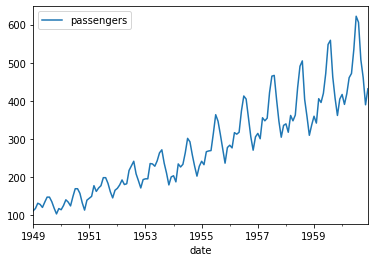

In [15]:
# ejemplo directo, gracias a que ya tenemos los índices y todo preparado
flight_df.plot()

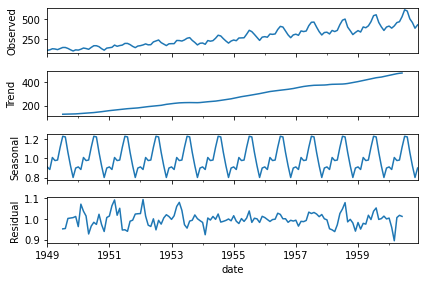

In [16]:
# Debido a que la altura de los ciclos parece aumentar --> esto nos indica que  
# usaremos la estacionalidad no lineal cuando la frecuencia aumenta o disminuye
# a lo largo del tiempo
sd = seasonal_decompose(flight_df['passengers'], model='multiplicative')

# Observed is the original chart
# Trend shows us if the number of passengers are tending up or down
# Seasonal data has had the trend data removed
# Residual data not effcted by trend and seasonal

# Observado es el gráfico original
# La tendencia nos muestra si el número de pasajeros tiende al alza o a la baja
# A los datos estacionales se les ha quitado la tendencia
# Los datos residuales no se ven afectados por la tendencia y la estacionalidad

sd.trend # Obtiene los datos de tendencia
sd.seasonal # Obtiene los datos estacionales 
sd.resid # Residuo

# Se puede resumir que la tendencia es que cada año vuela más gente 
sd.plot();

### Exponentially Weighted Moving Average

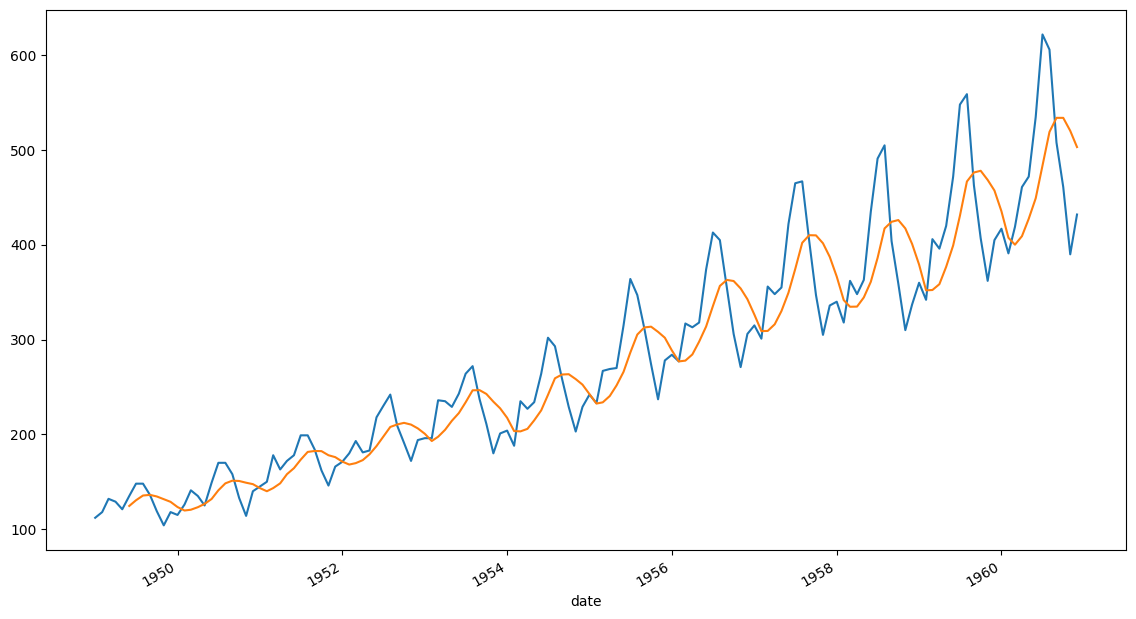

In [18]:
f_3 = plt.figure(figsize=(12,6), dpi=100)
ax_3 = f_3.add_axes([0.0, 0.0, 0.9, 0.9])
ax_3.plot(flight_df.index, flight_df['passengers'])

# Anteriormente vimos cómo se puede crear una media móvil (6 meses)
# que suaviza el gráfico pero muestra la estacionalidad

# media del rolling en tendencia
flight_df.rolling(window=6).mean()['passengers'].plot()

# si cambiamos por 12 la ventana tenemos una línea más estacionaria
# más focalizada en la tendencia
# flight_df.rolling(window=12).mean()['passengers'].plot()

In [19]:
# ¿y si queremos ponderar los datos más recientes porque suponemos que
# son más precisos? La media móvil estándar (standard moving average, SMA) describe todos los datos
# pero no es buena para predecir el comportamiento futuro. 
# Las SMAs también están sesgadas por las precisiones extremas de una sola vez.


# Comprobar si hay NaN en los datos
flight_df['passengers'].isnull().values.any()

False

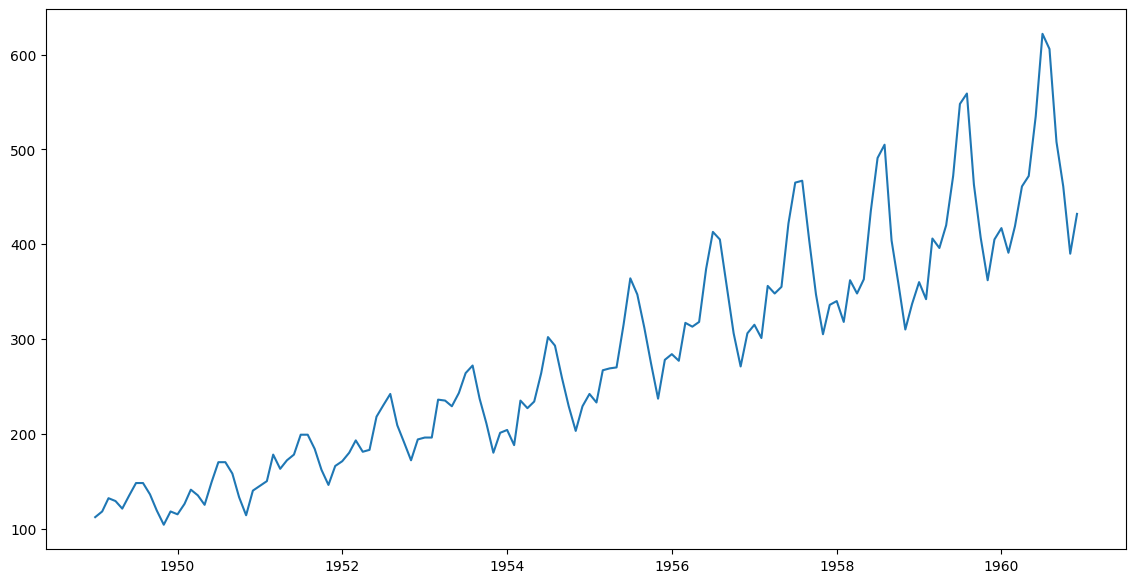

In [20]:
f_3 = plt.figure(figsize=(12,6), dpi=100)
ax_3 = f_3.add_axes([0.0, 0.0, 0.9, 0.9])
ax_3.plot(flight_df.index, flight_df['passengers'])
plt.show()


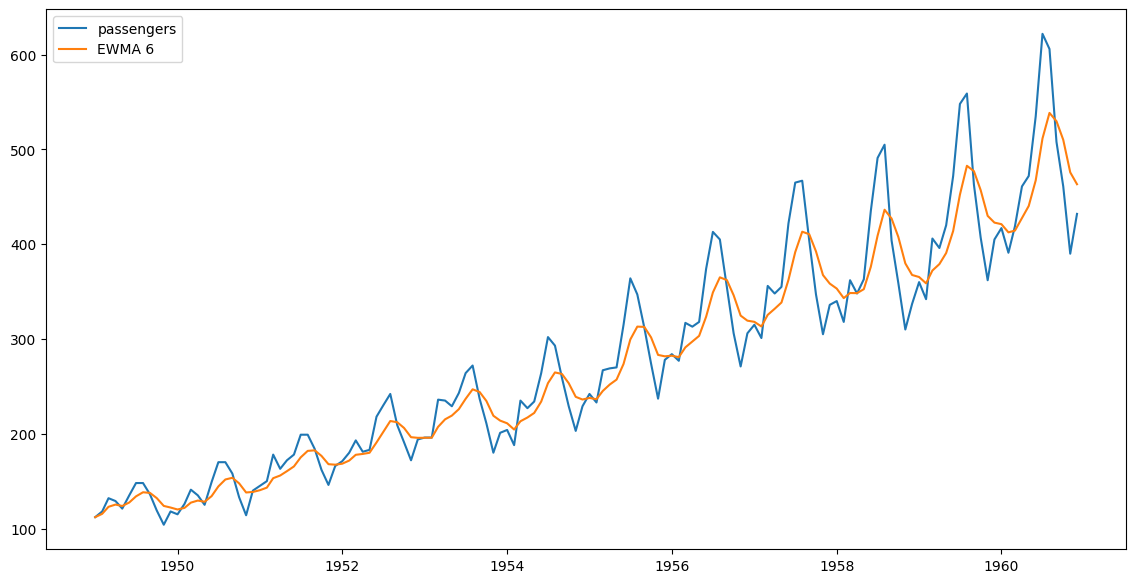

In [21]:
f_4 = plt.figure(figsize=(12,6), dpi=100)
ax_4 = f_4.add_axes([0.0, 0.0, 0.9, 0.9])

#ax_4.plot(flight_df.index, flight_df['passengers'])
#plt.show()
flight_df['EWMA 6'] = flight_df['passengers'].ewm(span=6).mean() # span cuenta los números de días, por defecto pongo a 6 pero más se suavizará a medida de que descienda


plt.plot(flight_df.index, flight_df['passengers'], label='passengers')
plt.plot(flight_df.index, flight_df['EWMA 6'], label='EWMA 6')

plt.legend()

# La estacionalidad tiene menos efecto al principio que al final
# porque hemos ponderado los puntos posteriores

#flight_df['EWMA 6'].plot()
plt.show()


In [ ]:
flight_df

,year,month,passengers,EWMA 6
0,1949,Jan,112,112.000000
1,1949,Feb,118,115.500000
2,1949,Mar,132,122.917431
3,1949,Apr,129,125.266892
4,1949,May,121,123.769332
...,...,...,...,...
139,1960,Aug,606,538.549357
140,1960,Sep,508,529.820969
141,1960,Oct,461,510.157835
142,1960,Nov,390,475.827025


# Continuar con el análisis exploratorio de los datos

In [26]:
passengers = flight_df
passengers_count = passengers['passengers']

y mostramos gráficas con diferentes rolling

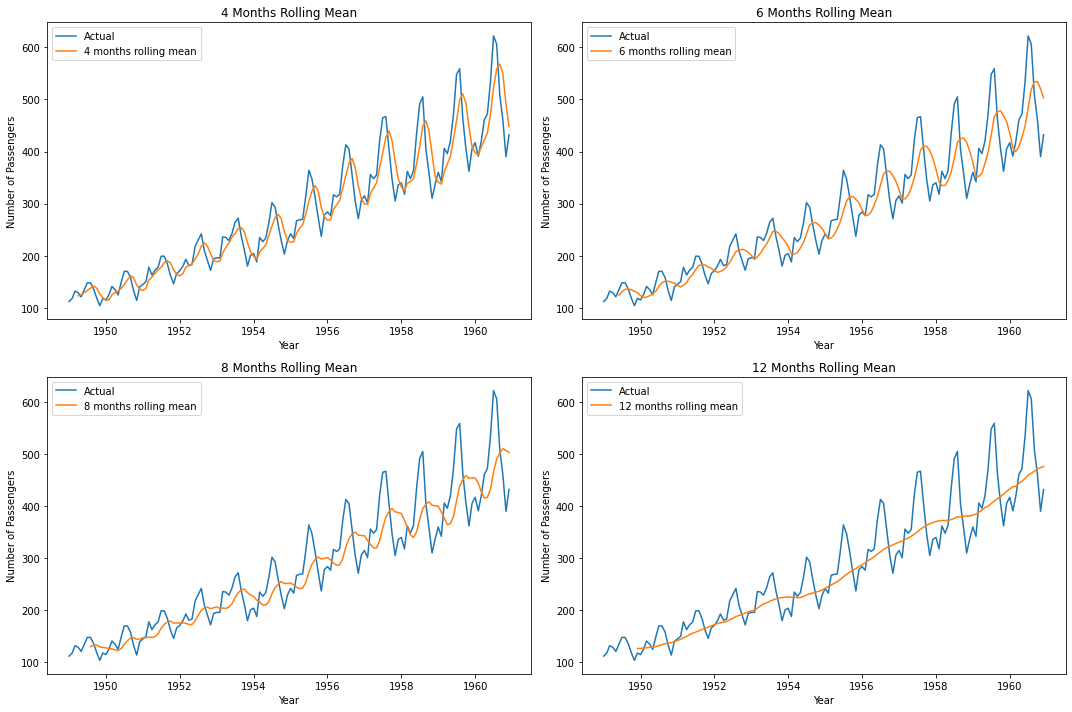

In [27]:

fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(passengers.index,passengers_count,label='Actual')
axes[0][0].plot(passengers.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(passengers.index,passengers_count,label='Actual')
axes[0][1].plot(passengers.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(passengers.index,passengers_count,label='Actual')
axes[1][0].plot(passengers.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(passengers.index,passengers_count,label='Actual')
axes[1][1].plot(passengers.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

Realizamos nuevas series temporales pivotando el dataframe original para representar por mes y año

Empezamos importando de nuevo

In [41]:
passengers2 = sns.load_dataset('flights')

In [43]:
passengers2['Date'] = dates
passengers2.set_index('Date',inplace=True)

In [44]:
passengers2.head()

,year,month,passengers
Date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


In [47]:
monthly = pd.pivot_table(data=passengers2,values='passengers',index='month',columns='year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


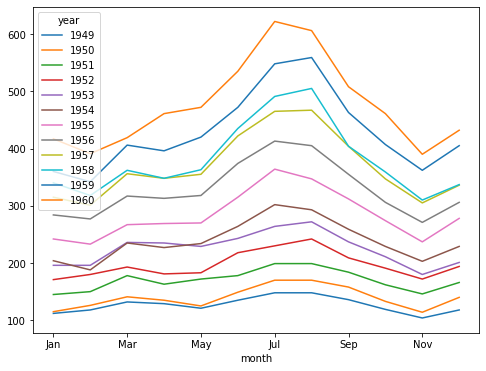

In [48]:
monthly.plot(figsize=(8,6))
plt.show()

In [49]:
yearly = pd.pivot_table(data=passengers,values='passengers',index='year',columns='month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


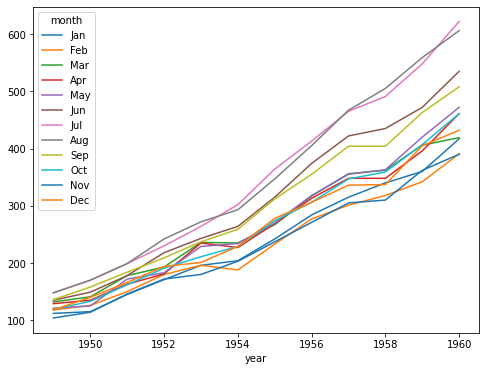

In [50]:
yearly.plot(figsize=(8,6))
plt.show()